In [2]:
import numpy as np
import pandas as pd
from PIL import Image as im
import matplotlib.pyplot as plt

In [7]:
greyImg = np.matrix([[0,255], [200,100], [75, 0]])

#Our initial Matrix:
#   | 0   255 |
#   | 200 100 |
#   | 75  0   |

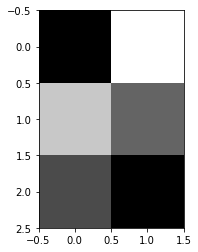

In [8]:
imgplot = plt.imshow(greyImg, cmap='gray')
#This is our matrix as a greyscale image

In [9]:
greyImgTranspose = greyImg.getH()

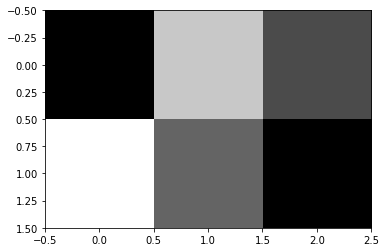

In [10]:
imgplot = plt.imshow(greyImgTranspose, cmap='gray')

In [11]:
matrixB = np.matmul(greyImg, greyImgTranspose)

[[65025 25500     0]
 [25500 50000 15000]
 [    0 15000  5625]]


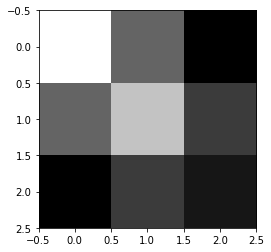

In [12]:
imgplot = plt.imshow(matrixB, cmap='gray')
print(matrixB)

Matrix U
[[ 0.77973396 -0.61107094  0.13640839]
 [ 0.61526087  0.70743229 -0.34784138]
 [ 0.11605607  0.35515048  0.92757702]]

Matrix Sigma
[[291.79814997   0.        ]
 [  0.         188.42462597]
 [  0.           0.        ]]

Matrix VTranspose
[[ 0.4515326   0.89225462]
 [ 0.89225462 -0.4515326 ]]

Matrix A (greyImg)
[[1.42108547e-14 2.55000000e+02]
 [2.00000000e+02 1.00000000e+02]
 [7.50000000e+01 2.48689958e-14]]


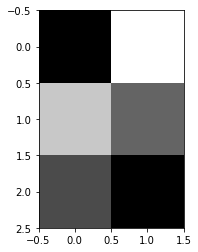

In [150]:
##Now we need to find the eigenvectors and eigenvalues of B
##The eigenvectors neeeds to be unit vectors

eigenValues = np.linalg.eig(matrixB)
eVals = np.linalg.eigvals(matrixB)

#These are the eigenValues
lambda1 = eigenValues[0][0]
lambda2 = eigenValues[0][1]
lambda3 = eigenValues[0][2]

#These are the eigenvectors
eVector1 = eigenValues[1][0]
eVector2 = eigenValues[1][1]
eVector3 = eigenValues[1][2]

#This is matrix U
matrixU = np.hstack((eVector1.getH(), eVector2.getH(), eVector3.getH()))
matrixU = matrixU.getH()
print("Matrix U")
print(matrixU)
print()

#This is matrix Sigma
print("Matrix Sigma")
matrixSigma = np.matrix([[lambda1**.5,0], [0,lambda2**.5], [0,0]])
print(matrixSigma)
print()

v1 = 1/(lambda1**.5) * np.matmul(greyImg.getH(), matrixU[:,0])
v2 = 1/(lambda2**.5) * np.matmul(greyImg.getH(), matrixU[:,1])
matrixVTranspose = np.hstack((v1, v2))
print("Matrix VTranspose")
print(matrixV)

#Then our formula is A = U * Sigma * V(transpose)
print()
print("Matrix A (greyImg)")
print(np.matmul(matrixU, np.matmul(matrixSigma, matrixVTranspose)))

plt.imshow(np.matmul(matrixU, np.matmul(matrixSigma, matrixVTranspose)), cmap='gray')

Matrix U
[[ 0.77973396 -0.61107094]
 [ 0.61526087  0.70743229]
 [ 0.11605607  0.35515048]]

Matrix Sigma
[[291.79814997   0.        ]
 [  0.         188.42462597]]

Matrix V Transpose
[[ 0.4515326   0.89225462]
 [ 0.89225462 -0.4515326 ]]

Matrix A
[[-1.42108547e-14  2.55000000e+02]
 [ 2.00000000e+02  1.00000000e+02]
 [ 7.50000000e+01  2.13162821e-14]]


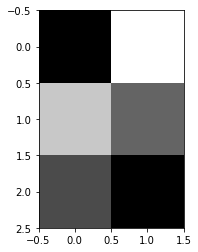

In [147]:
#Now this whole process can be done with the command np.linalg.svd
u, s, vh = np.linalg.svd(greyImg, full_matrices=False)
print("Matrix U")
print(u)
print()
print("Matrix Sigma")
print(np.diag(s))
print()
print("Matrix V Transpose")
print(vh)
print()

print("Matrix A")
print(np.matmul(u, np.matmul(np.diag(s), vh)))
plt.imshow(np.matmul(u, np.matmul(np.diag(s), vh)), cmap='gray')